In [25]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
import utils

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

In [26]:
tracks= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
tracks_cut=['album','artist']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks=tracks.droplevel(0,axis=1)
tracks.drop(index=tracks[tracks.subset=='large'].index, inplace=True)
tracks_cut=['composer', 'date_created','date_recorded',
            'license','number','title','language_code',
            'publisher', 'tags','information','lyricist','genres','genres_all',
             'split','subset']
tracks.drop(tracks_cut,axis=1,inplace=True)
#tracks.drop(tracks[tracks['genre_top']=='Spoken'].index, inplace=True)

In [27]:
features= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/features.csv")
feat=features[['spectral_centroid']]
feat=feat.droplevel(0,axis=1)
feat.columns=['kurtosis','max','mean','median','min','skew','std']
#cut=['roll_kurtosis','roll_max','roll_std','roll_median','roll_min','roll_skew']
#feat.drop(cut,axis=1,inplace=True)

In [28]:
#estrazioni da librosa_mp3 di 10  secondi dopo i primi 10 features rolloff
ts=pd.read_csv("/Users/david/Desktop/DM2 project/fma_metadata/ts_centroid.csv")
cut_columns=['Unnamed: 0','Unnamed: 0.1']
ts.drop(cut_columns, axis=1, inplace=True)
ts.shape

(1028, 1207)

In [29]:
ts=ts.set_index(['track_id'])

In [30]:
ts_df=pd.merge(tracks,ts, on='track_id')
ts_df.shape

(1028, 1213)

In [31]:
cut=ts_df.iloc[:,7:]
cut

0         1         2         3         4         5  \
track_id                                                               
4850      0.203188  0.177222  0.170356  0.174893  0.181088  0.179945   
4851      0.139737  0.162770  0.188715  0.196280  0.222101  0.236519   
5009      0.097878  0.141881  0.181742  0.295769  0.343891  0.415385   
5012      0.088058  0.103542  0.167626  0.233723  0.334451  0.458624   
5013      0.134297  0.198303  0.286986  0.377489  0.289663  0.278561   
...            ...       ...       ...       ...       ...       ...   
145571    0.104488  0.142267  0.201845  0.222700  0.233242  0.242973   
148488    0.372093  0.432888  0.514998  0.490458  0.413571  0.402621   
148490    0.236911  0.315912  0.430291  0.527045  0.610343  0.618256   
149735    0.256851  0.237183  0.212326  0.156835  0.160548  0.165636   
152844    0.462726  0.438414  0.487034  0.571057  0.667958  0.698864   

                 6         7         8         9  ...      1196      1197  \
track_id                                          ...                       
4850      0.180785  0.181348  0.175140  0.177304  ...  0.429477  0.438678   
4851      0.235485  0.234684  0.237329  0.223463  ...  0.100511  0.092096   
5009      0.524990  0.526107  0.438027  0.430539  ...  0.396982  0.354043   
5012      0.421045  0.172120  0.230144  0.366459  ...  0.291008  0.467978   
5013      0.435295  0.430005  0.354197  0.245915  ...  0.469473  0.409380   
...            ...       ...       ...       ...  ...       ...       ...   
145571    0.254982  0.262475  0.263909  0.196623  ...  0.684569  0.636211   
148488    0.491540  0.525808  0.532001  0.530079  ...  0.533067  0.665458   
148490    0.632774  0.603301  0.517525  0.518159  ...  0.759514  0.767398   
149735    0.171989  0.213143  0.252836  0.292861  ...  0.163778  0.084274   
152844    0.621619  0.614751  0.600630  0.624657  ...  0.637446  0.649099   

              1198      1199      1200      1201      1202      1203  \
track_id                                                               
4850      0.423448  0.416010  0.414990  0.434620  0.557168  0.779985   
4851      0.077473  0.062344  0.058620  0.039428  0.035532  0.036547   
5009      0.370011  0.368628  0.309365  0.282796  0.272292  0.276301   
5012      0.473676  0.195546  0.092509  0.263610  0.330493  0.367824   
5013      0.320596  0.243092  0.350757  0.478701  0.517602  0.362054   
...            ...       ...       ...       ...       ...       ...   
145571    0.606933  0.574697  0.627221  0.655860  0.663117  0.688209   
148488    0.739708  0.792238  0.852144  0.858632  0.790833  0.733323   
148490    0.699457  0.517079  0.291194  0.326616  0.426413  0.417115   
149735    0.112486  0.050523  0.021821  0.120618  0.125440  0.141565   
152844    0.621641  0.585209  0.687812  0.650924  0.525279  0.425969   

              1204      1205  
track_id                      
4850      0.852099  0.806474  
4851      0.003289  0.039476  
5009      0.301752  0.270572  
5012      0.399824  0.282295  
5013      0.187761  0.319275  
...            ...       ...  
145571    0.765299  0.918020  
148488    0.712553  0.685199  
148490    0.455782  0.601036  
149735    0.123273  0.093007  
152844    0.410384  0.372014  

[1028 rows x 1206 columns]

In [32]:
ts_df.drop(cut,axis=1, inplace=True)

In [33]:
ts_df=pd.merge(ts_df,feat, on='track_id')

In [34]:
ts_df.head()

bit_rate  comments  duration  favorites            genre_top  \
track_id                                                                 
4850        256000         0       164         14            Classical   
4851        256000         0       236          9            Classical   
5009        128000         0       257          1  Old-Time / Historic   
5012        128000         0       245         11  Old-Time / Historic   
5013        128000         0       269          6  Old-Time / Historic   

          interest  listens   kurtosis          max         mean       median  \
track_id                                                                        
4850         13686    13221  40.157177  5693.858887   531.164001   445.917084   
4851          9840     9283  45.221325  5715.818359   462.206146   386.870026   
5009          3487     1900  29.038763  5579.080566   997.398926   933.559448   
5012          3911     3032  17.429407  5512.500000  1491.275391  1410.062988   
5013          5027     3946  71.632355  5511.795410   999.326538   958.825928   

                 min      skew         std  
track_id                                    
4850      249.851807  5.489871  376.292480  
4851        0.000000  5.831337  378.367340  
5009        0.000000  4.048092  321.319214  
5012        0.000000  3.420450  337.361053  
5013        0.000000  6.991871  252.320953

In [35]:
ts_df['genre_top'].value_counts()

Classical              526
Old-Time / Historic    502
Blues                    0
Country                  0
Easy Listening           0
Electronic               0
Experimental             0
Folk                     0
Hip-Hop                  0
Instrumental             0
International            0
Jazz                     0
Pop                      0
Rock                     0
Soul-RnB                 0
Spoken                   0
Name: genre_top, dtype: int64

# Lag Plot

Text(0.5, 1.0, 'Lag plot')

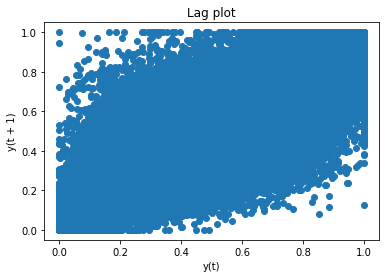

In [12]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(ts.T,lag=1)
plt.title('Lag plot')

Text(0.5, 1.0, 'Autocorrelation plot')

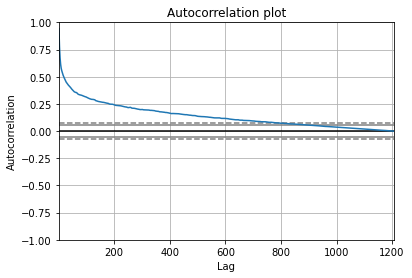

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts.T)
plt.title('Autocorrelation plot')

In [14]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax

In [15]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) #(mu=0., std=1.)  # Rescale time series
ts_scaled= scaler.fit_transform(ts) #.values.reshape(1,-1))

In [16]:
ts_scaled=ts_scaled.squeeze()
ts_scaled.shape

(1028, 1206)

# CLUSTERING

In [17]:
ts= pd.DataFrame(ts_scaled, index =ts.index,columns=ts.columns)

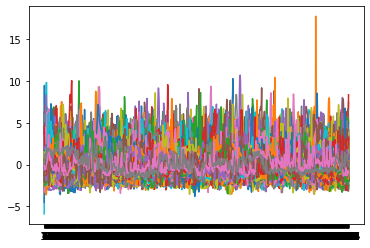

In [18]:
plt.plot(ts.T)
plt.show()

## Shape-based Clustering

# KMeans

In [36]:
#libreries for clustering
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from tslearn.clustering import TimeSeriesKMeans

### K-MEANS VALIDATION

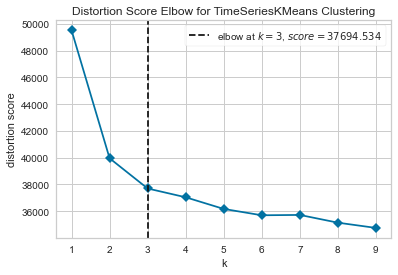

<AxesSubplot:title={'center':'Distortion Score Elbow for TimeSeriesKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Instantiate the clustering model and visualizer
model = TimeSeriesKMeans()
visualizer = KElbowVisualizer(model, k=(1,10),timings=False) #timengs = time to compute

visualizer.fit(ts)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [38]:
#calculate silhouette for different values of K
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = TimeSeriesKMeans( n_clusters = k )
    model_kmeans_k.fit(ts)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(ts, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    
print("Done!")

Tested kMeans with k = 2	SS: 0.1617
Tested kMeans with k = 3	SS: 0.1008
Tested kMeans with k = 4	SS: 0.0496
Tested kMeans with k = 5	SS: 0.0525
Tested kMeans with k = 6	SS: 0.0345
Tested kMeans with k = 7	SS: 0.0351
Tested kMeans with k = 8	SS: 0.0328
Tested kMeans with k = 9	SS: 0.0322
Tested kMeans with k = 10	SS: 0.0403
Done!


In [40]:
#convert dict values to a list 
sil_v = []
for i in silhouette_scores.values():
    sil_v.append(i)

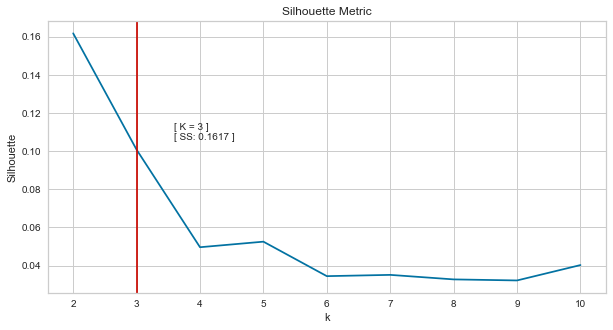

In [42]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v)
plt.xticks(range(0,9,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.1617 ] ')
plt.show()


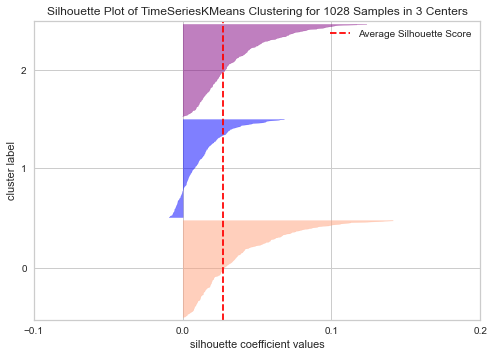

<AxesSubplot:title={'center':'Silhouette Plot of TimeSeriesKMeans Clustering for 1028 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
#visualize silhouette for K=3
from yellowbrick.cluster import SilhouetteVisualizer

model = TimeSeriesKMeans(3)
visualizer = SilhouetteVisualizer(model, colors = ['lightsalmon','blue','purple'])

visualizer.fit(ts)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [209]:
km= TimeSeriesKMeans(n_clusters=3,metric='euclidean',n_init=10, max_iter=200, random_state=0)
km.fit(ts)

TimeSeriesKMeans(max_iter=200, n_init=10, random_state=0)

In [210]:
km.cluster_centers_.shape

(3, 1206, 1)

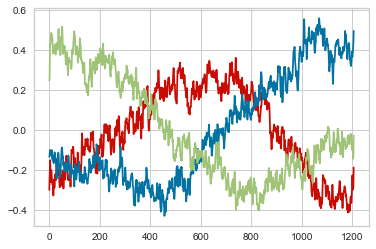

In [211]:
plt.plot(np.squeeze(km.cluster_centers_[0], ).T, color='r')
plt.plot(np.squeeze(km.cluster_centers_[1],).T, color='b')
plt.plot(np.squeeze(km.cluster_centers_[2], ).T, color='g')
plt.show()

In [212]:
ts_df_eu=ts_df.copy()
ts_df_eu['Cluster_eu']=km.labels_

In [213]:
clas_0=ts_df_eu[ts_df_eu['genre_top']=='Classical'][ts_df_eu['Cluster_eu']==0].index
clas_1=ts_df_eu[ts_df_eu['genre_top']=='Classical'][ts_df_eu['Cluster_eu']==1].index
clas_2=ts_df_eu[ts_df_eu['genre_top']=='Classical'][ts_df_eu['Cluster_eu']==2].index
old_0=ts_df_eu[ts_df_eu['genre_top']=='Old-Time / Historic'][ts_df_eu['Cluster_eu']==0].index
old_1=ts_df_eu[ts_df_eu['genre_top']=='Old-Time / Historic'][ts_df_eu['Cluster_eu']==1].index
old_2=ts_df_eu[ts_df_eu['genre_top']=='Old-Time / Historic'][ts_df_eu['Cluster_eu']==2].index

In [214]:
print('Cluster 0: Classical:{}, Old-Time/Historic:{}, Total of:{}'.format(len(clas_0),len(old_0),len(clas_0)+len(old_0)))
print('Cluster 1: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_1),len(old_1),len(clas_1)+len(old_1)))
print('Cluster 2: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_2),len(old_2),len(clas_2)+len(old_2)))

Cluster 0: Classical:170, Old-Time/Historic:178, Total of:348
Cluster 1: Classical:207, Old-Time/Historic:134, Total of 341
Cluster 2: Classical:149, Old-Time/Historic:190, Total of 339


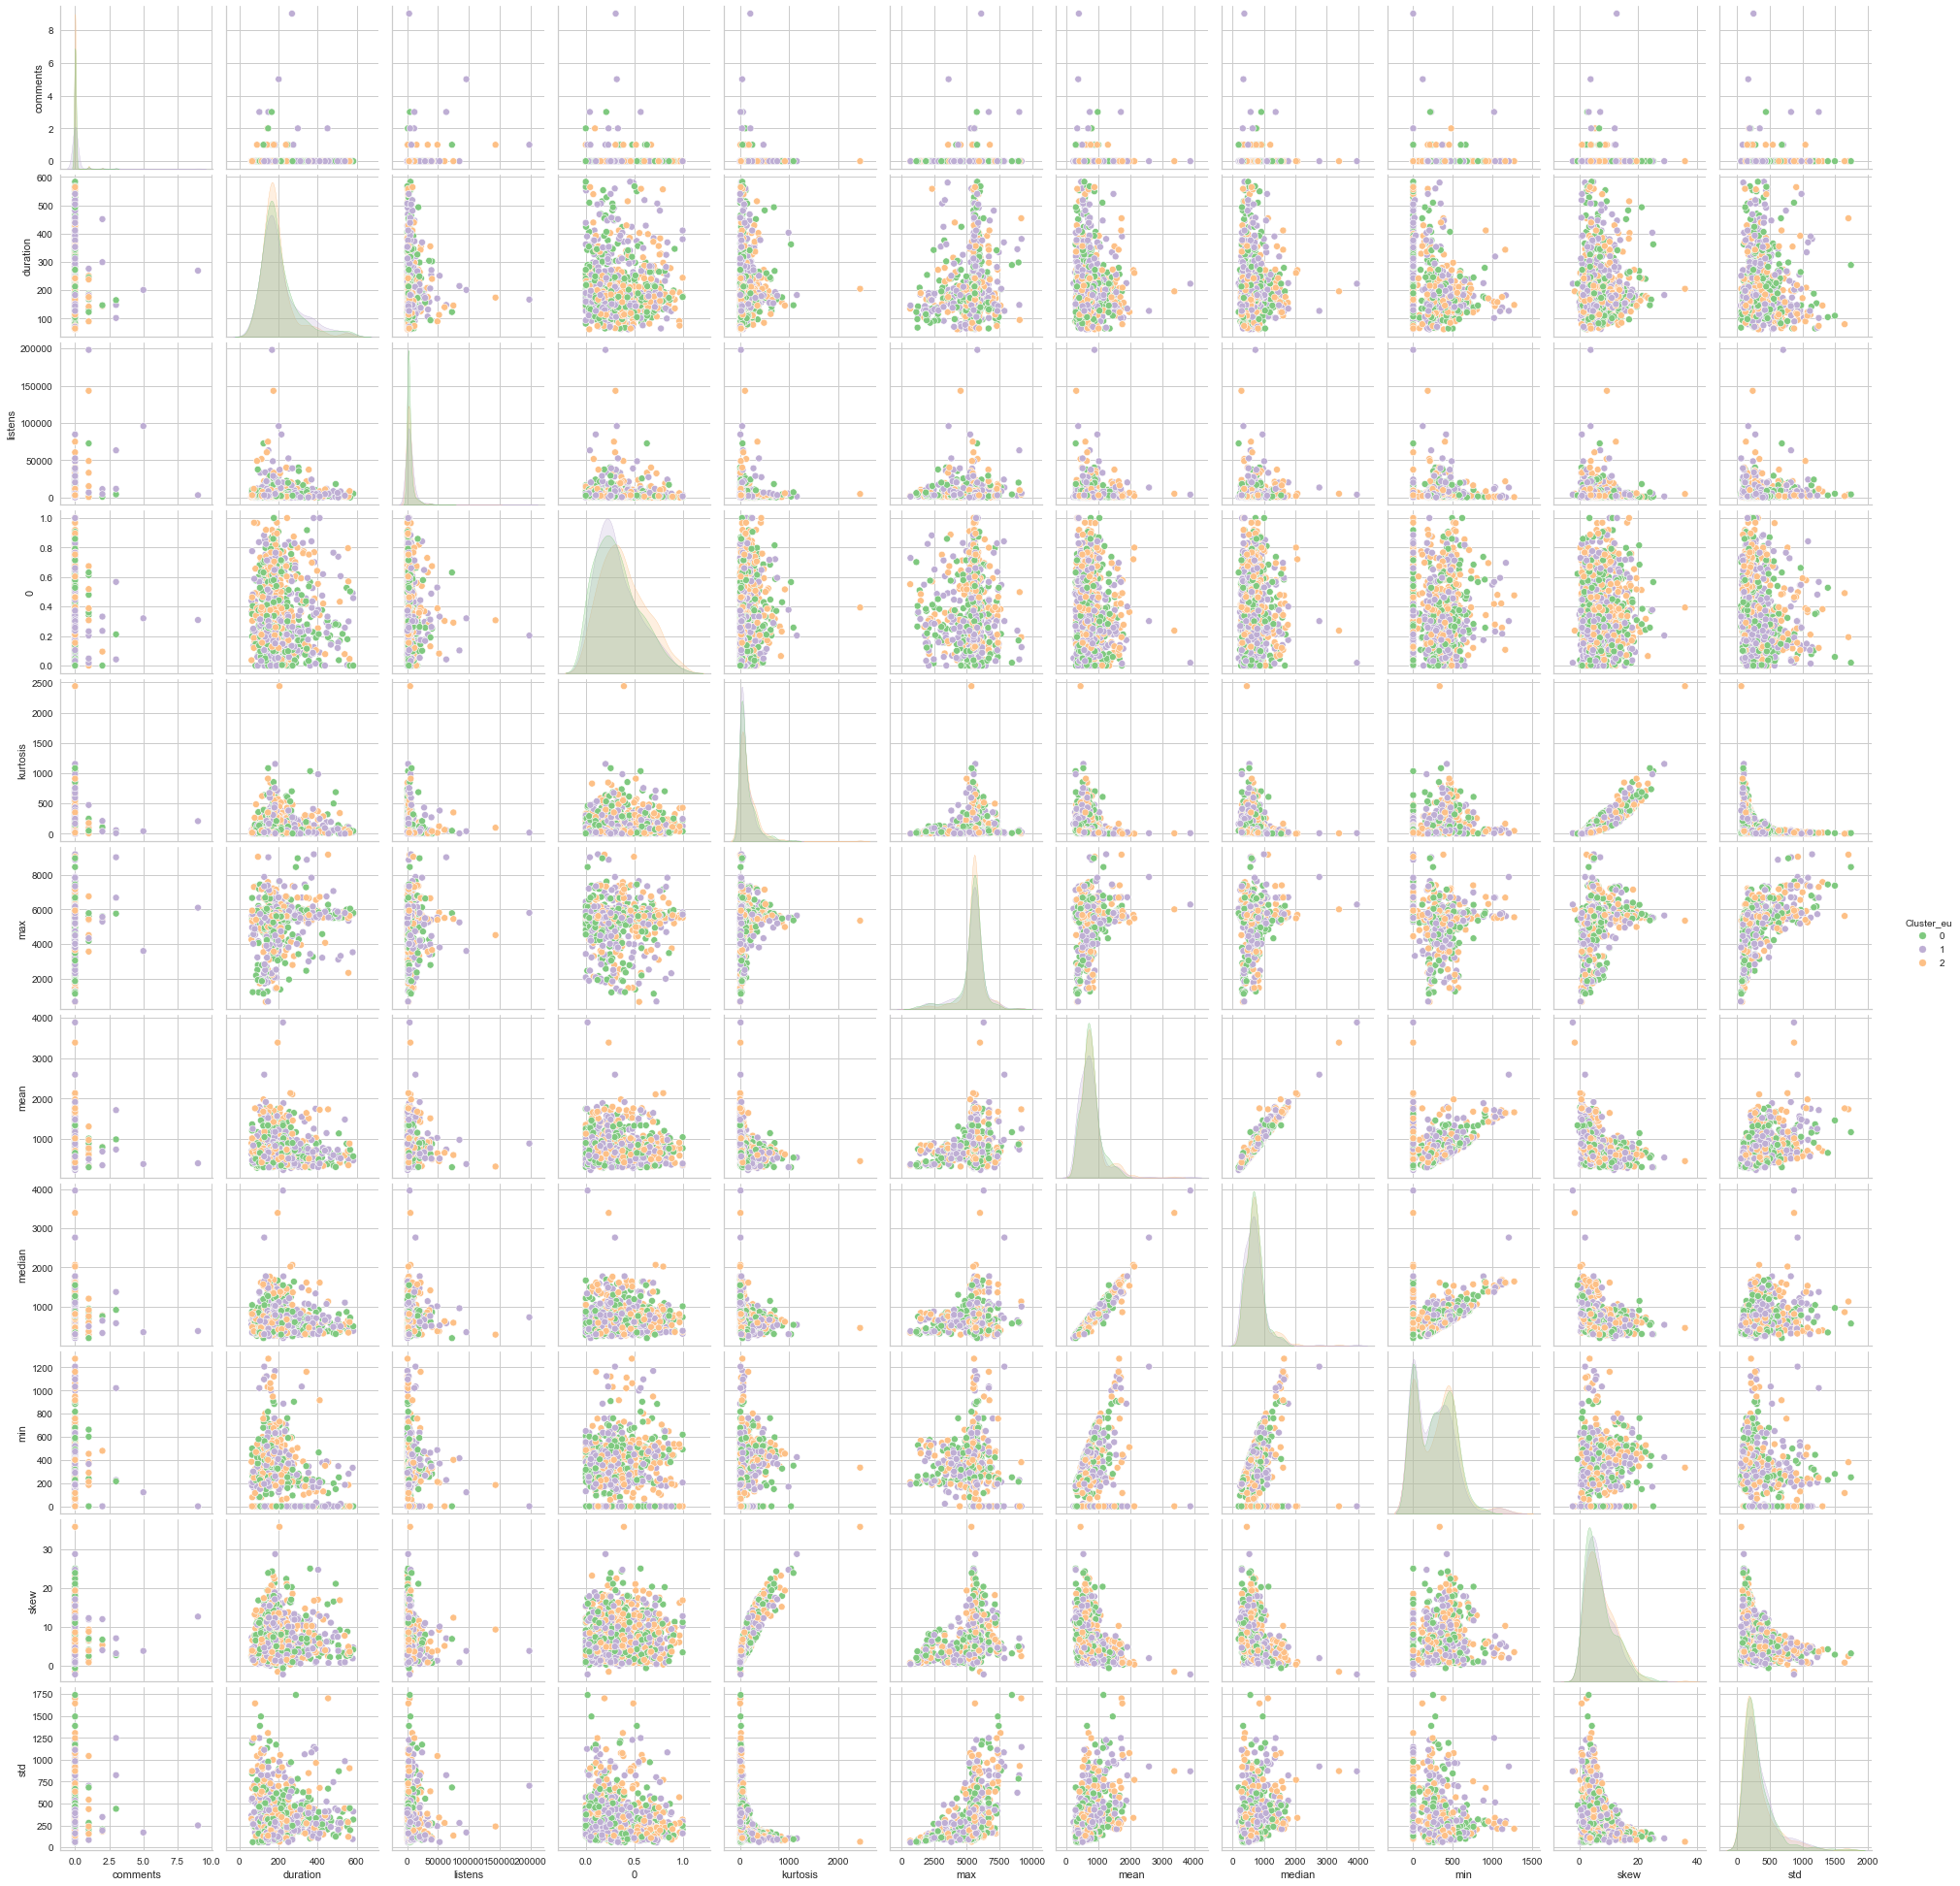

In [215]:
sns.pairplot(ts_df_eu, palette='Accent', hue='Cluster_eu')

## KMeans: DTW

In [ ]:
km_dtw=TimeSeriesKMeans(n_clusters=3, metric='dtw', n_init=10, max_iter=200, max_iter_barycenter=100, random_state=0)
km_dtw.fit(ts)

In [ ]:
plt.plot(np.squeeze(km_dtw.cluster_centers_[0], ).T, color='r')
plt.plot(np.squeeze(km_dtw.cluster_centers_[1],).T, color='b')
plt.plot(np.squeeze(km_dtw.cluster_centers_[2], ).T, color='g')
plt.show()
plt.figure(figsize=(6,30))
plt.show()

In [ ]:
#Observing the size of each cluster
np.unique(km_dtw.labels_, return_counts=True)

In [ ]:
ts_df_dtw=ts_df_dtws_df.copy()
ts_df_dtw["Cluster_dtw"] = km_dtw.labels_

In [ ]:
clas_0_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Classical'][ts_df_dtw['Cluster_dtw']==0].index
clas_1_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Classical'][ts_df_dtw['Cluster_dtw']==1].index
clas_2_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Classical'][ts_df_dtw['Cluster_dtw']==2].index
old_0_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Old-Time / Historic'][ts_df_dtw['Cluster_dtw']==0].index
old_1_dtw=ts_df_dtw[ts_df_dtw['genre_top']=='Old-Time / Historic'][ts_df_dtw['Cluster_dtw']==1].index
old_2_dtw=ts_df_dte[ts_df_dtw['genre_top']=='Old-Time / Historic'][ts_df_dtw['Cluster_dtw']==2].index

In [ ]:
print('Cluster 0: Classical:{}, Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_dtw),len(old_0_dtw),len(clas_0_dtw)+len(old_0_dtw)))
print('Cluster 1: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_1_dtw),len(old_1_dtw),len(clas_1_dtw)+len(old_1_dtw)))
print('Cluster 2: Classical:{}, Old-Time/Historic:{}, Total of {}'.format(len(clas_2_dtw),len(old_2_dtw),len(clas_2_dtw)+len(old_2_dtw)))

In [ ]:
sns.pairplot(ts_df_eu, palette='Accent', hue='Cluster_dtw')
plt.show()

# Approximated Clustering

## PiecewiseAggregateApproximation

In [20]:
import ruptures as rpt
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

In [21]:
n_paa_segments = 240
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(ts)

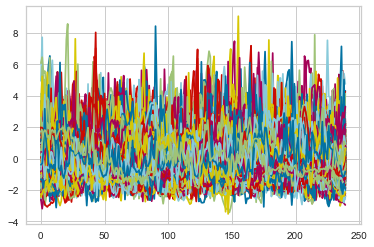

In [161]:
plt.plot(X_paa.T.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

## PAA: Euclidean

In [70]:
km_paa_eu = TimeSeriesKMeans(n_clusters=3, metric="euclidean",n_init=10, max_iter=200, random_state=0)
km_paa_eu.fit(X_paa)

TimeSeriesKMeans(max_iter=200, n_init=10, random_state=0)

In [71]:
km_paa_eu.cluster_centers_.shape

(3, 240, 1)

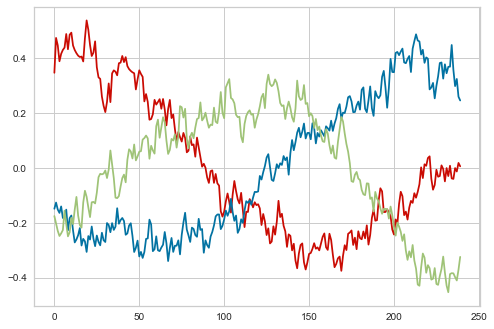

In [72]:
plt.plot(np.squeeze(km_paa_eu.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_paa_eu.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_paa_eu.cluster_centers_[2]).T, color='g')
plt.show()

In [165]:
#Observing the size of each cluster
np.unique(km_paa_eu.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([329, 376, 323], dtype=int64))

In [166]:
ts_df1=ts_df.copy()
ts_df1["Cluster__paa_eu"] = km_paa_eu.labels_

In [167]:
clas_0_paa_eu=ts_df1[ts_df1['genre_top']=='Classical'][ts_df1["Cluster__paa_eu"]==0].index
clas_1_paa_eu=ts_df1[ts_df1['genre_top']=='Classical'][ts_df1["Cluster__paa_eu"]==1].index
clas_2_paa_eu=ts_df1[ts_df1['genre_top']=='Classical'][ts_df1["Cluster__paa_eu"]==2].index
old_0_paa_eu=ts_df1[ts_df1['genre_top']=='Old-Time / Historic'][ts_df1["Cluster__paa_eu"]==0].index
old_1_paa_eu=ts_df1[ts_df1['genre_top']=='Old-Time / Historic'][ts_df1["Cluster__paa_eu"]==1].index
old_2_paa_eu=ts_df1[ts_df1['genre_top']=='Old-Time / Historic'][ts_df1["Cluster__paa_eu"]==2].index

In [168]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_paa_eu),len(old_0_paa_eu),len(old_0_paa_eu)+len(clas_0_paa_eu)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_paa_eu),len(old_1_paa_eu),len(old_1_paa_eu)+len(clas_1_paa_eu)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_paa_eu),len(old_2_paa_eu),len(old_2_paa_eu)+len(clas_2_paa_eu)))

Cluster 0: Classical:145,Old-Time/Historic:184, Total of:329
Cluster 1: Classical:222,Old-Time/Historic:154, Total of:376
Cluster 2: Classical:159,Old-Time/Historic:164, Total of:323


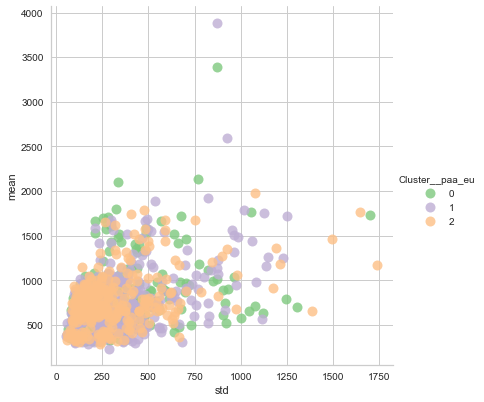

In [169]:
sns.lmplot(data=ts_df1,
                  y='mean',
                  x='std', hue='Cluster__paa_eu',markers=['o','o','o'],
                  size=5.5,
                  fit_reg =False,
                  palette='Accent',
                  scatter_kws={'s':100})
plt.show()

## PAA: DTW

In [57]:
km_paa_dtw = TimeSeriesKMeans(n_clusters=3,  metric='dtw', n_init=10, max_iter=200, max_iter_barycenter=100, random_state=0)
km_paa_dtw.fit(X_paa)

TimeSeriesKMeans(max_iter=200, metric='dtw', n_init=10, random_state=0)

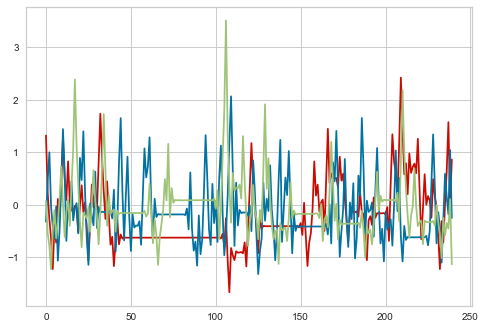

In [58]:
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_[2]).T, color='g')
plt.show()

In [59]:
#Observing the size of each cluster
np.unique(km_paa_dtw.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([262, 410, 356], dtype=int64))

In [60]:
ts_df2=ts_df.copy()
ts_df2["Cluster__paa_dtw"] = km_paa_dtw.labels_

In [61]:
clas_0_paa_dtw=ts_df2[ts_df2['genre_top']=='Classical'][ts_df2["Cluster__paa_dtw"]==0].index
clas_1_paa_dtw=ts_df2[ts_df2['genre_top']=='Classical'][ts_df2["Cluster__paa_dtw"]==1].index
clas_2_paa_dtw=ts_df2[ts_df2['genre_top']=='Classical'][ts_df2["Cluster__paa_dtw"]==2].index
old_0_paa_dtw=ts_df2[ts_df2['genre_top']=='Old-Time / Historic'][ts_df2["Cluster__paa_dtw"]==0].index
old_1_paa_dtw=ts_df2[ts_df2['genre_top']=='Old-Time / Historic'][ts_df2["Cluster__paa_dtw"]==1].index
old_2_paa_dtw=ts_df2[ts_df2['genre_top']=='Old-Time / Historic'][ts_df2["Cluster__paa_dtw"]==2].index

In [62]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_paa_dtw),len(old_0_paa_dtw),len(old_0_paa_dtw)+len(clas_0_paa_dtw)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_paa_dtw),len(old_1_paa_dtw),len(old_1_paa_dtw)+len(clas_1_paa_dtw)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_paa_dtw),len(old_2_paa_dtw),len(old_2_paa_dtw)+len(clas_2_paa_dtw)))

Cluster 0: Classical:214,Old-Time/Historic:48, Total of:262
Cluster 1: Classical:66,Old-Time/Historic:344, Total of:410
Cluster 2: Classical:246,Old-Time/Historic:110, Total of:356


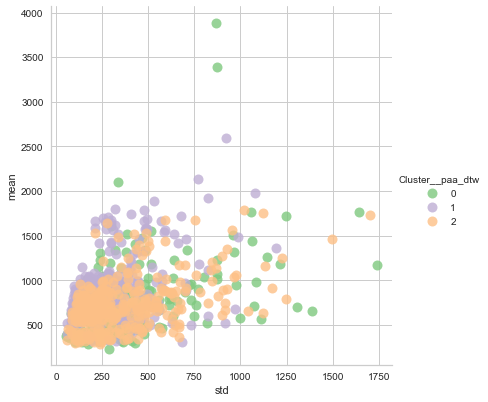

In [176]:
sns.lmplot(data=ts_df2,
                  y='mean',
                  x='std', hue='Cluster__paa_dtw',markers=['o','o','o'],
                  size=5.5,
                  fit_reg =False,
                  palette='Accent',
                  scatter_kws={'s':100})
plt.show()

## SAX: Euclidean

In [22]:
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
X_sax = sax.fit_transform(ts)

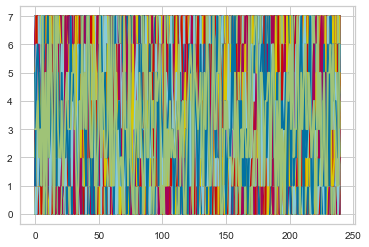

In [178]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.show()

In [74]:
km_sax = TimeSeriesKMeans(n_clusters=3, metric="euclidean",n_init=10, max_iter=200, random_state=0)
km_sax.fit(X_sax)

TimeSeriesKMeans(max_iter=200, n_init=10, random_state=0)

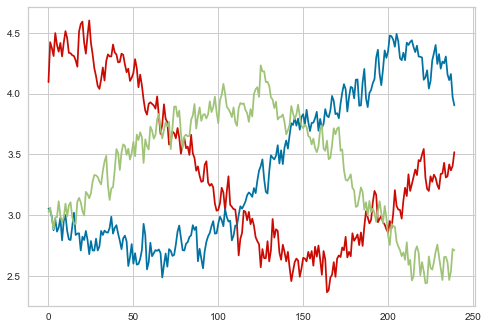

In [75]:
plt.plot(np.squeeze(km_sax.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_sax.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_sax.cluster_centers_[2]).T, color='g')
plt.show()

In [181]:
#Observing the size of each cluster
np.unique(km_sax.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([307, 360, 361], dtype=int64))

In [152]:
ts_df3=ts_df.copy()
ts_df3["Cluster__sax_eu"] = km_sax.labels_

In [153]:
clas_0_sax_eu=ts_df3[ts_df3['genre_top']=='Classical'][ts_df3["Cluster__sax_eu"]==0].index
clas_1_sax_eu=ts_df3[ts_df3['genre_top']=='Classical'][ts_df3["Cluster__sax_eu"]==1].index
clas_2_sax_eu=ts_df3[ts_df3['genre_top']=='Classical'][ts_df3["Cluster__sax_eu"]==2].index
old_0_sax_eu=ts_df3[ts_df3['genre_top']=='Old-Time / Historic'][ts_df3["Cluster__sax_eu"]==0].index
old_1_sax_eu=ts_df3[ts_df3['genre_top']=='Old-Time / Historic'][ts_df3["Cluster__sax_eu"]==1].index
old_2_sax_eu=ts_df3[ts_df3['genre_top']=='Old-Time / Historic'][ts_df3["Cluster__sax_eu"]==2].index

In [154]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_sax_eu),len(old_0_sax_eu),len(old_0_sax_eu)+len(clas_0_sax_eu)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_sax_eu),len(old_1_sax_eu),len(old_1_sax_eu)+len(clas_1_sax_eu)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_sax_eu),len(old_2_sax_eu),len(old_2_sax_eu)+len(clas_2_sax_eu)))

Cluster 0: Classical:142,Old-Time/Historic:165, Total of:307
Cluster 1: Classical:212,Old-Time/Historic:148, Total of:360
Cluster 2: Classical:172,Old-Time/Historic:189, Total of:361


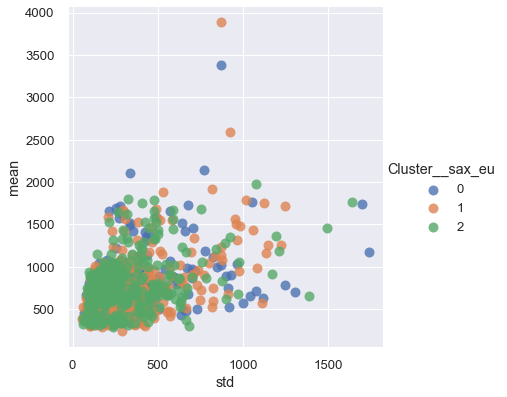

In [185]:
palette ={0: "C0", 1: "C1", 2: "C2"}
sns.lmplot(data=ts_df3,
                  y='mean',
                  x='std', hue='Cluster__sax_eu',markers=['o','o','o'],
                  size=5.5,
                  fit_reg =False,
                  palette=palette,
                  scatter_kws={'s':100})
plt.show()

## SAX: DTW

In [23]:
km_sax_dtw = TimeSeriesKMeans(n_clusters=3, metric='dtw', n_init=10, max_iter=200, max_iter_barycenter=100, random_state=0)
km_sax_dtw.fit(X_sax)

TimeSeriesKMeans(max_iter=200, metric='dtw', n_init=10, random_state=0)

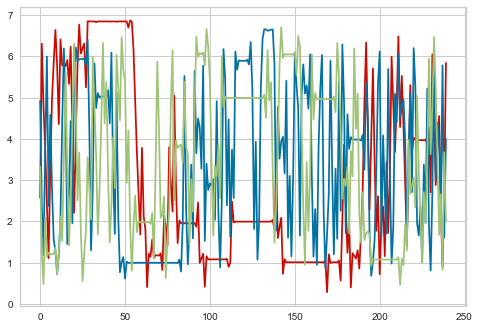

In [24]:
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_[0]).T, color='r')
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_[1]).T, color='b')
plt.plot(np.squeeze(km_sax_dtw.cluster_centers_[2]).T, color='g')
plt.show()

In [25]:
#Observing the size of each cluster
np.unique(km_sax_dtw.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([256, 422, 350], dtype=int64))

In [26]:
ts_df4=ts_df.copy()
ts_df4["Cluster"] = km_sax_dtw.labels_

In [27]:
clas_0_sax_dtw=ts_df4[ts_df4['genre_top']=='Classical'][ts_df4["Cluster"]==0].index
clas_1_sax_dtw=ts_df4[ts_df4['genre_top']=='Classical'][ts_df4["Cluster"]==1].index
clas_2_sax_dtw=ts_df4[ts_df4['genre_top']=='Classical'][ts_df4["Cluster"]==2].index
old_0_sax_dtw=ts_df4[ts_df4['genre_top']=='Old-Time / Historic'][ts_df4["Cluster"]==0].index
old_1_sax_dtw=ts_df4[ts_df4['genre_top']=='Old-Time / Historic'][ts_df4["Cluster"]==1].index
old_2_sax_dtw=ts_df4[ts_df4['genre_top']=='Old-Time / Historic'][ts_df4["Cluster"]==2].index

In [28]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_sax_dtw),len(old_0_sax_dtw),len(old_0_sax_dtw)+len(clas_0_sax_dtw)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_sax_dtw),len(old_1_sax_dtw),len(old_1_sax_dtw)+len(clas_1_sax_dtw)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_sax_dtw),len(old_2_sax_dtw),len(old_2_sax_dtw)+len(clas_2_sax_dtw)))

Cluster 0: Classical:217,Old-Time/Historic:39, Total of:256
Cluster 1: Classical:71,Old-Time/Historic:351, Total of:422
Cluster 2: Classical:238,Old-Time/Historic:112, Total of:350


[]

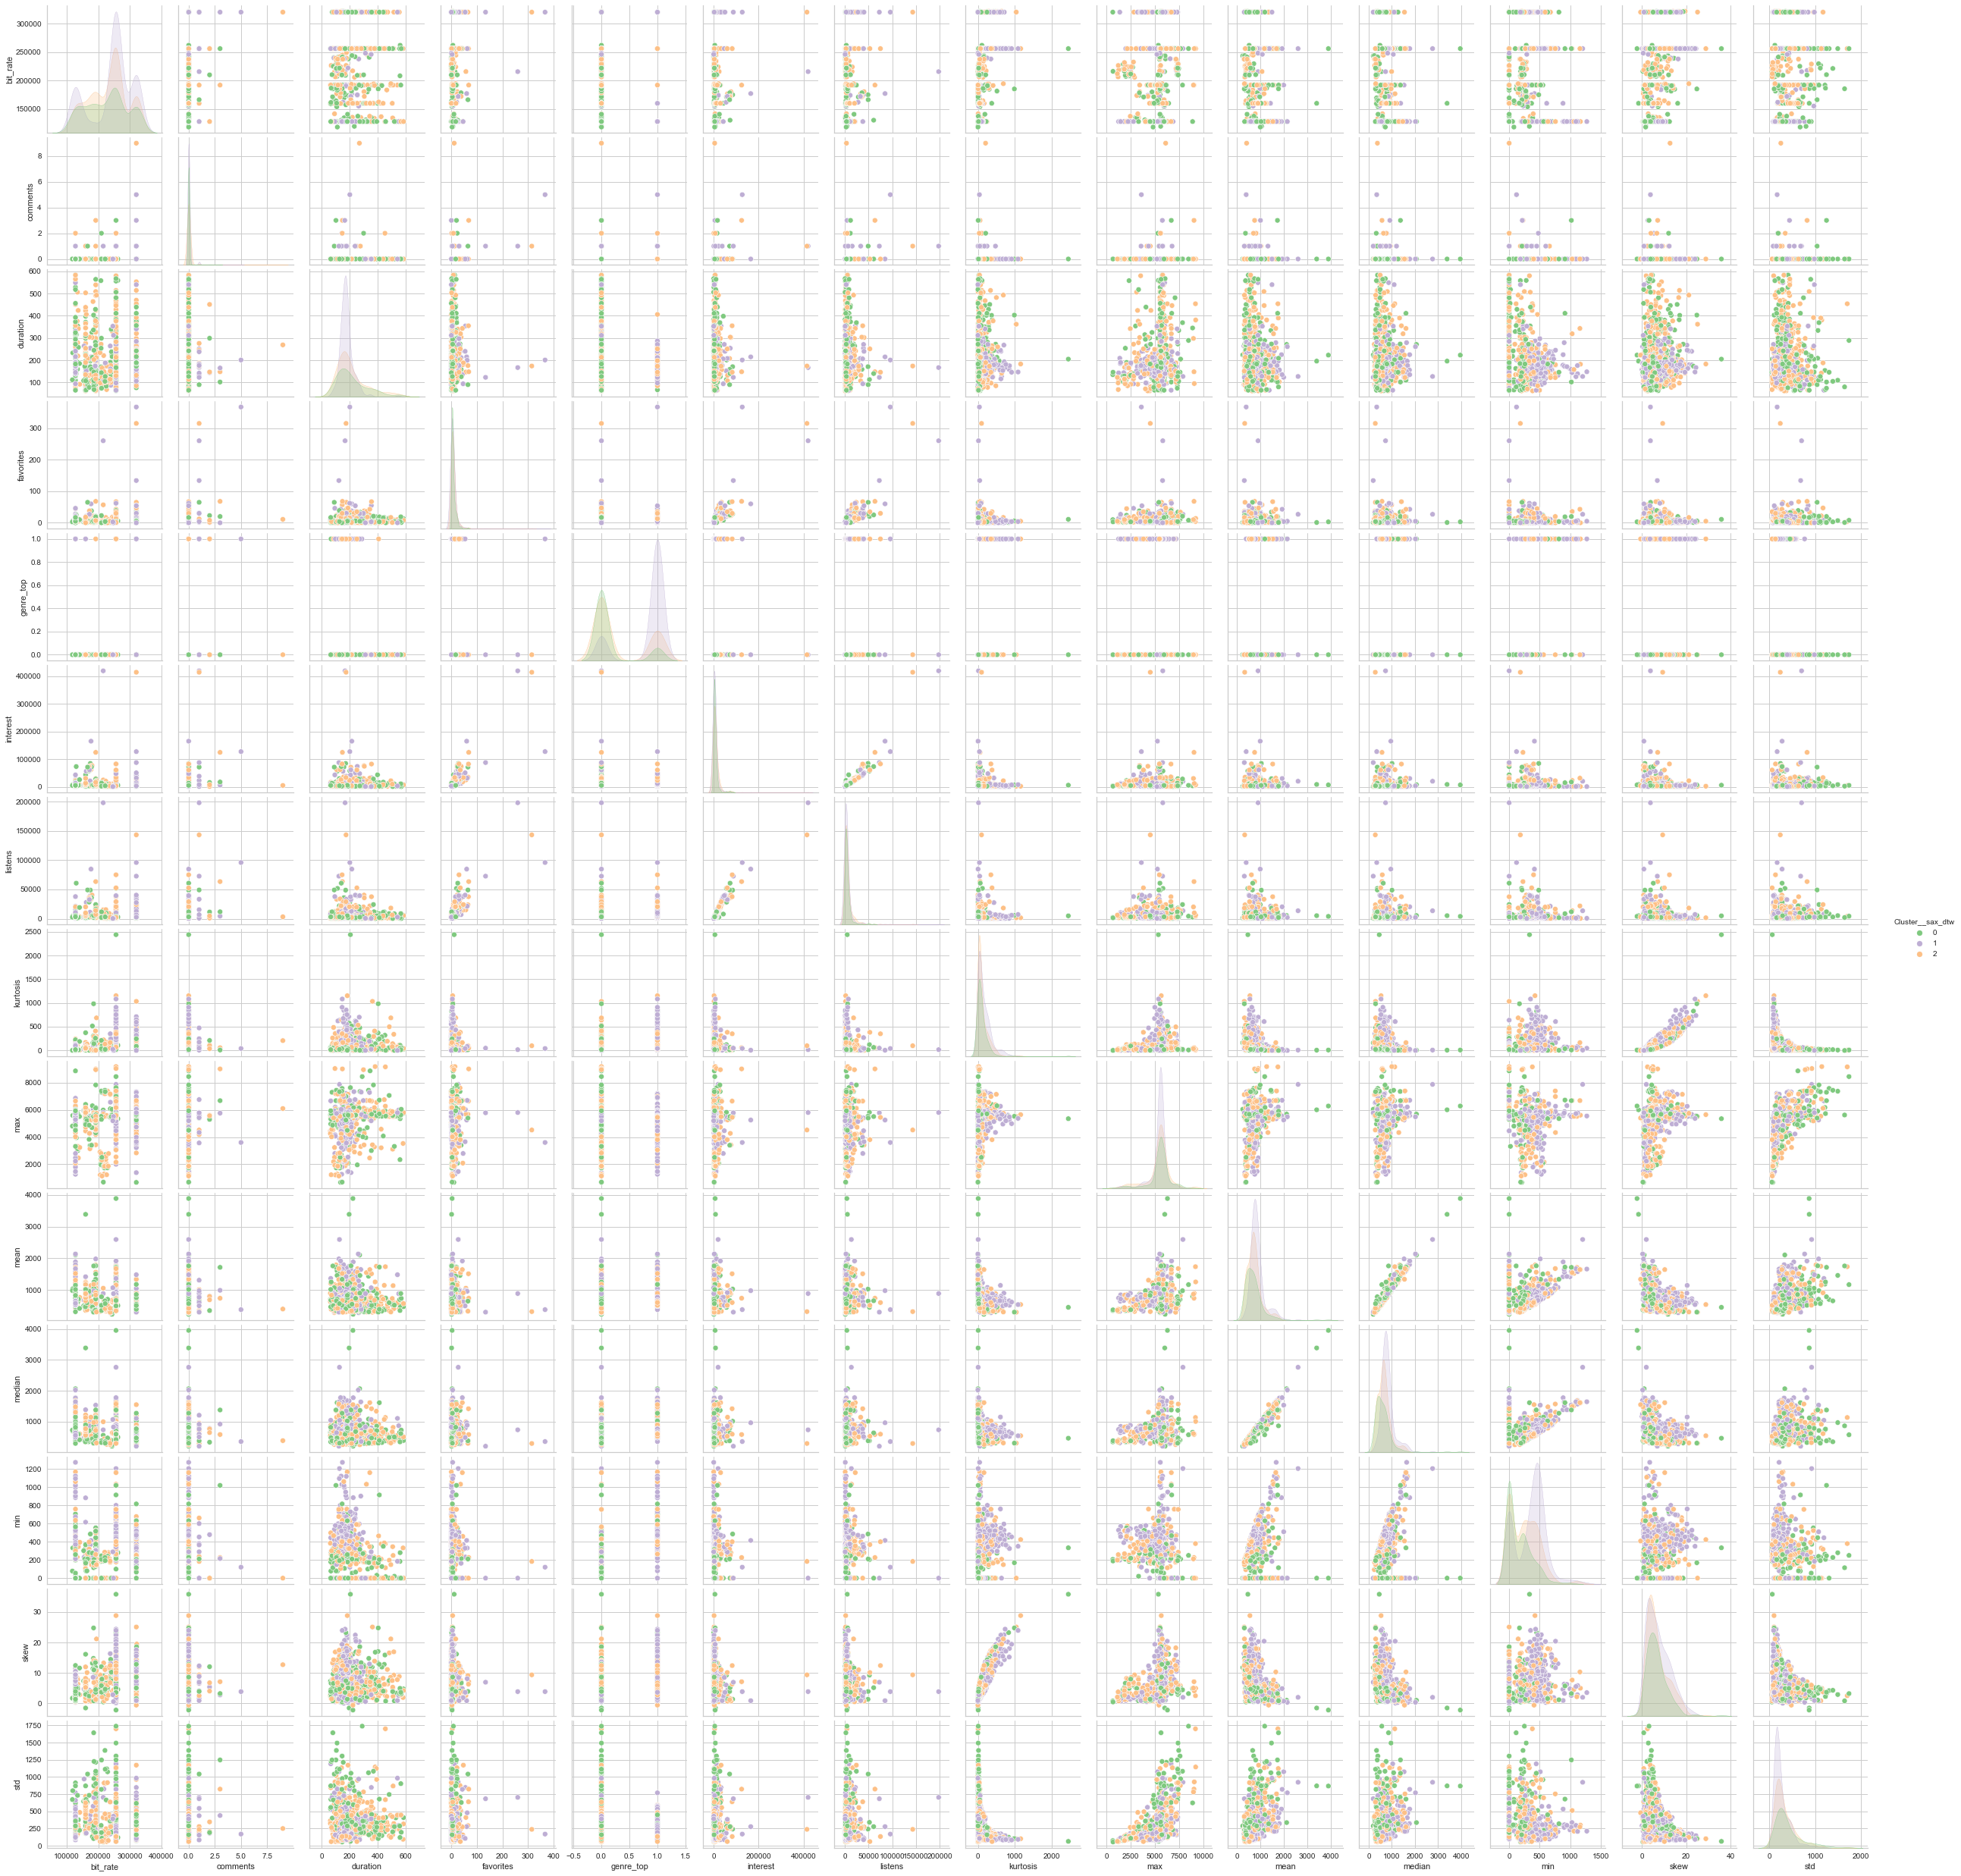

In [133]:
sns.pairplot(ts_df4, hue='Cluster__sax_dtw', palette='Accent')
plt.plot()

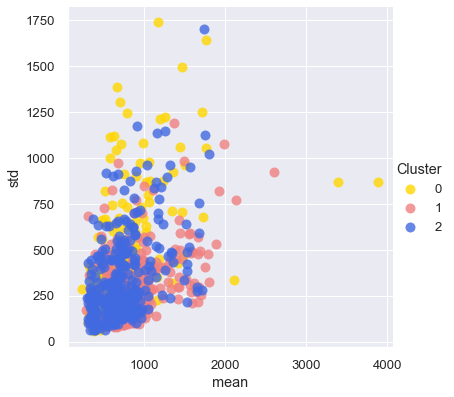

<Figure size 1080x720 with 0 Axes>

In [334]:
palette ={0: "gold", 1: "lightcoral", 2: "royalblue"}
sns.lmplot(data=ts_df4,
                  y='std',
                  x='mean', hue='Cluster',markers=['o','o','o'],
                  size=5.5, 
                   palette=palette,
                  fit_reg =False,
                  scatter_kws={'s':100})
plt.figure(figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'Genres per Cluster')

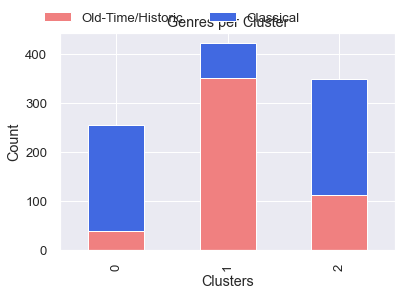

In [239]:
ts_df4['Old-Time/Historic'] = ts_df4['genre_top'].map({'Old-Time / Historic':1, 'Classical':0}) 
ts_df4['Classical'] = ts_df4['genre_top'].map({'Old-Time / Historic':0, 'Classical':1}) 

ts_df4.groupby('Cluster').agg('sum')[['Old-Time/Historic', 'Classical']].plot(kind='bar', stacked=True, color=['lightcoral', 'royalblue'])
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.title('Genres per Cluster')

# Confronto K-Means Clusters Centroids

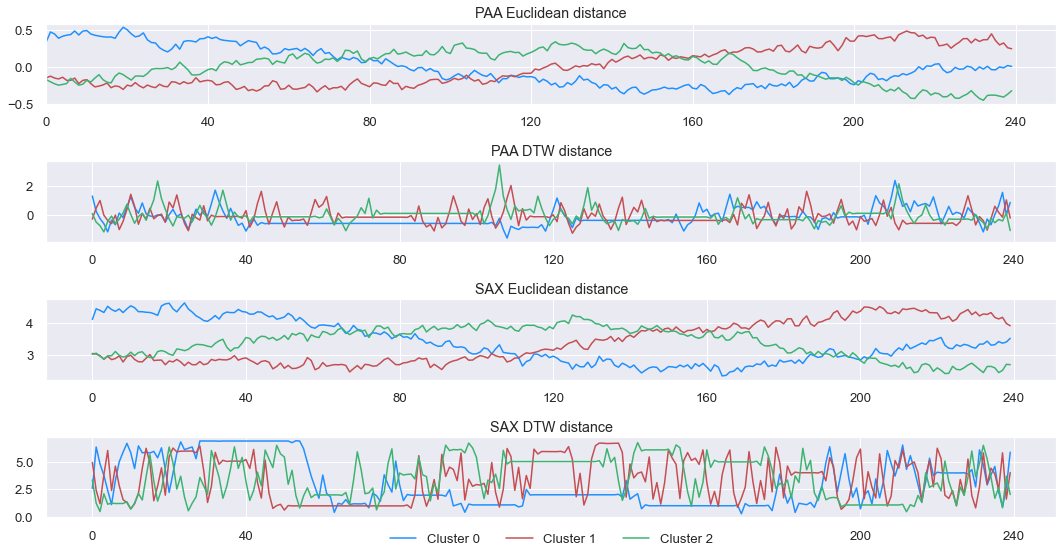

In [253]:
fig, ax=plt.subplots(4,1,figsize=(15,8))

ax[0].plot(np.squeeze(km_paa_eu.cluster_centers_[0] ).T,color='dodgerblue',label='0')
ax[0].plot(np.squeeze(km_paa_eu.cluster_centers_[1]).T,color='r',label='1')
ax[0].plot(np.squeeze(km_paa_eu.cluster_centers_[2]).T,color='mediumseagreen',label='2')
ax[0].set_title('PAA Euclidean distance')
ax[0].set_xticks([0.0,40.0,80.0,120.0,160.0,200.0,240.0])
ax[0].set_xlim([0.0,250.0])

ax[1].plot(np.squeeze(km_paa_dtw.cluster_centers_[0]).T,color='dodgerblue',label='0')
ax[1].plot(np.squeeze(km_paa_dtw.cluster_centers_[1]).T,color='r',label='1')
ax[1].plot(np.squeeze(km_paa_dtw.cluster_centers_[2]).T,color='mediumseagreen',label='2')
ax[1].set_title('PAA DTW distance')
ax[1].set_xticks([0.0,40.0,80.0,120.0,160.0,200.0,240.0])

ax[2].plot(np.squeeze(km_sax.cluster_centers_[0]).T,color='dodgerblue',label='0')
ax[2].plot(np.squeeze(km_sax.cluster_centers_[1]).T,color='r',label='1')
ax[2].plot(np.squeeze(km_sax.cluster_centers_[2]).T,color='mediumseagreen',label='2')
ax[2].set_title('SAX Euclidean distance')
ax[2].set_xticks([0.0,40.0,80.0,120.0,160.0,200.0,240.0])

ax[3].plot(np.squeeze(km_sax_dtw.cluster_centers_[0]).T,color='dodgerblue',label='0')
ax[3].plot(np.squeeze(km_sax_dtw.cluster_centers_[1]).T,color='r',label='1')
ax[3].plot(np.squeeze(km_sax_dtw.cluster_centers_[2]).T,color='mediumseagreen',label='2')
ax[3].set_title('SAX DTW distance')
ax[3].set_xticks([0.0,40.0,200.0,240.0])
ax[3].legend(['Cluster 0','Cluster 1','Cluster 2'],loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol =3) 


plt.tight_layout()

plt.show()

# Hierarchical: Euclidean

In [29]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from tslearn.metrics import dtw as dtw
from matplotlib import pyplot as plt

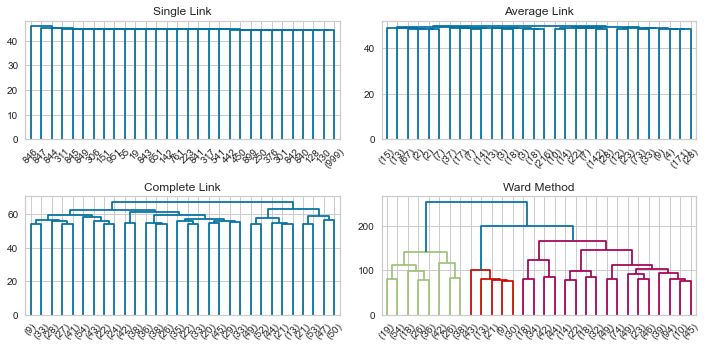

In [30]:
plt.figure( figsize=(10,5))

plt.subplot(2,2, 1)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Single Link')

plt.subplot(2, 2, 2)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Average Link')

plt.subplot(2,2, 3)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Complete Link')

plt.subplot(2, 2, 4)
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')
plt.title('Ward Method')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Complete')

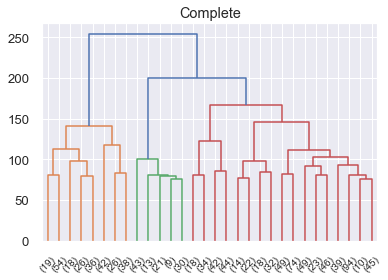

In [327]:
#ward link
data_dist = pdist(ts, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

plt.title('Complete')

In [32]:
ts_df.iloc[9]

comments                       0
duration                     258
genre_top    Old-Time / Historic
listens                     1019
0                            0.0
kurtosis               13.331332
max                  5502.308106
mean                 1154.982056
median                1056.62793
min                          0.0
skew                    2.676594
std                    351.40979
Name: 5018, dtype: object

### ward link

In [ ]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ward.fit_predict(ts)

In [34]:
ts_df_hier=ts_df.copy()
ts_df_hier['Cluster']=ward.labels_

In [35]:
clas_0_h=ts_df_hier[ts_df_hier['genre_top']=='Classical'][ts_df_hier["Cluster"]==0].index
clas_1_h=ts_df_hier[ts_df_hier['genre_top']=='Classical'][ts_df_hier["Cluster"]==1].index
clas_2_h=ts_df_hier[ts_df_hier['genre_top']=='Classical'][ts_df_hier["Cluster"]==2].index
old_0_h=ts_df_hier[ts_df_hier['genre_top']=='Old-Time / Historic'][ts_df_hier["Cluster"]==0].index
old_1_h=ts_df_hier[ts_df_hier['genre_top']=='Old-Time / Historic'][ts_df_hier["Cluster"]==1].index
old_2_h=ts_df_hier[ts_df_hier['genre_top']=='Old-Time / Historic'][ts_df_hier["Cluster"]==2].index

In [36]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_h),len(old_0_h),len(old_0_h)+len(clas_0_h)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_h),len(old_1_h),len(old_1_h)+len(clas_1_h)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_h),len(old_2_h),len(old_2_h)+len(clas_2_h)))

Cluster 0: Classical:285,Old-Time/Historic:368, Total of:653
Cluster 1: Classical:167,Old-Time/Historic:92, Total of:259
Cluster 2: Classical:74,Old-Time/Historic:42, Total of:116


Text(0.5, 1.0, "Ward's Method")

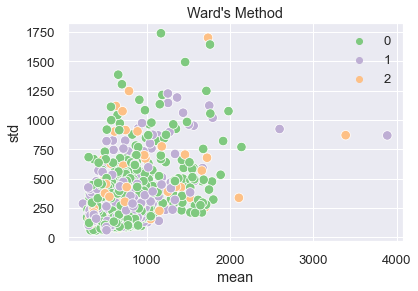

In [333]:
sns.scatterplot(data=ts_df_hier, x='mean', y='std',hue= 'Cluster', palette='Accent',s=90)
plt.legend()
plt.title('Ward\'s Method')

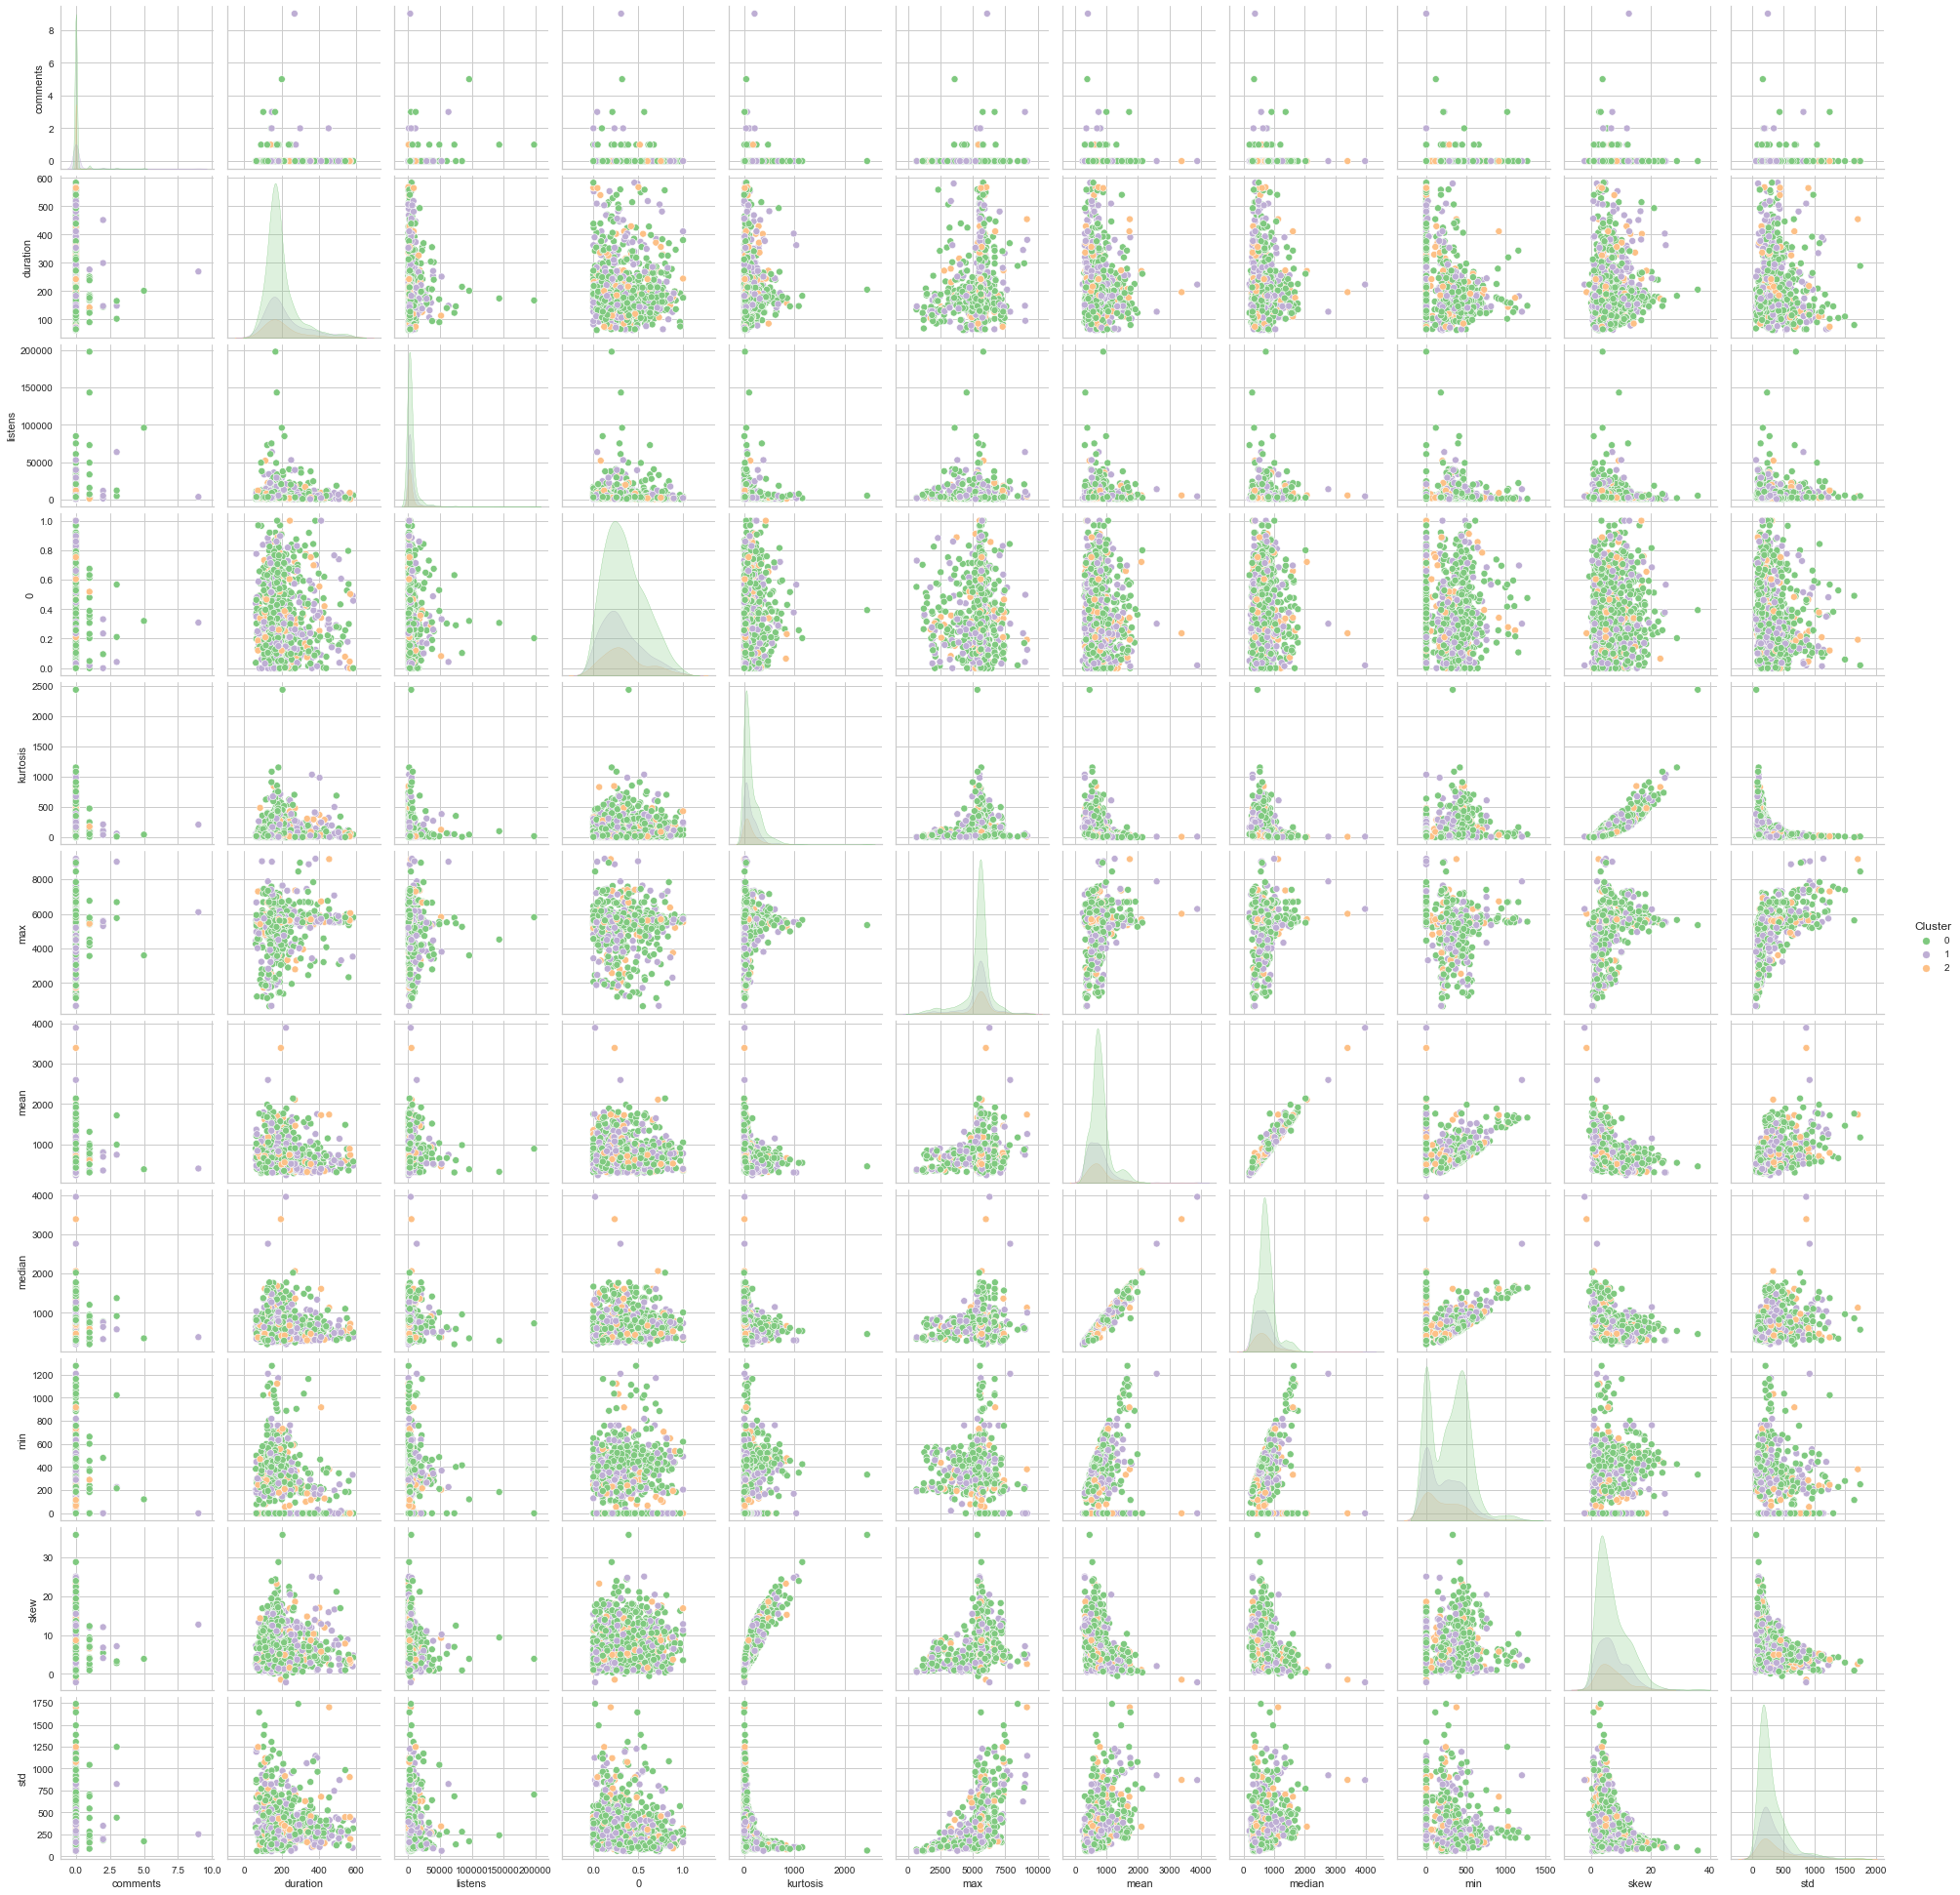

In [37]:
sns.pairplot(ts_df_hier, hue='Cluster', palette='Accent')
plt.show()

In [294]:
#wards method _ silhouette scores
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores_w = {}

for k in k_to_test:
    ward_linkage = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    
    ward_linkage.fit(ts)
    labels_kw = ward_linkage.labels_
    score_kw = silhouette_score(ts, ward_linkage.labels_)
    silhouette_scores_w[k] = score_kw
    
    print ('silhouette for k= {}: {}'.format(k,score_kw))
print('Done')

silhouette for k= 2: 0.024224235787977718
silhouette for k= 3: 0.010095688077622749
silhouette for k= 4: 0.010596940573566591
silhouette for k= 5: 0.010788236455009197
silhouette for k= 6: 0.005479764742136714
silhouette for k= 7: 0.001931266212164225
silhouette for k= 8: -0.001973524204321472
silhouette for k= 9: -0.0017534452037365345
silhouette for k= 10: 5.2822098054962475e-05
Done


In [295]:
#wards method values
sil_vw = []
for i in silhouette_scores_w.values():
    sil_vw.append(i)

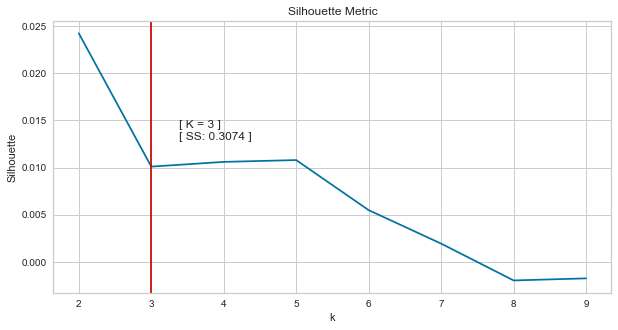

In [40]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v)
plt.xticks(range(0,8,1), silhouette_scores_w.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.3074 ] ')
plt.show()


### complete link

In [296]:
#complete link _ silhouette scores
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    complete_linkage = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean')
    
    complete_linkage.fit(ts)
    labels_k = complete_linkage.labels_
    score_k = silhouette_score(ts, complete_linkage.labels_)
    silhouette_scores[k] = score_k
    
    print ('silhouette for k= {}: {}'.format(k,score_k))
print('Done')

silhouette for k= 2: 0.0154044830107515
silhouette for k= 3: 0.009194696489653324
silhouette for k= 4: 0.007121794322446939
silhouette for k= 5: 0.0010404098958331207
silhouette for k= 6: 0.0013646169312834864
silhouette for k= 7: 0.0011172652593396891
silhouette for k= 8: -0.0006771366275918555
silhouette for k= 9: 0.0002769777306196809
silhouette for k= 10: -0.00046847455581458205
Done


In [297]:
#complete link values
sil_v = []
for i in silhouette_scores.values():
    sil_v.append(i)

### average

In [298]:
#average_link silhouette scores
k_to_test_avg = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores_avg = {}

for k in k_to_test_avg:
    average_linkage = AgglomerativeClustering(n_clusters=k, linkage='average', affinity='euclidean')
    
    average_linkage.fit(ts)
    labels_k_avg = average_linkage.labels_
    score_k_avg = silhouette_score(ts, average_linkage.labels_)
    silhouette_scores_avg[k] = score_k_avg
    
    print ('silhouette for k= {}: {}'.format(k,score_k_avg))
print('Done')

silhouette for k= 2: 0.022146927292694452
silhouette for k= 3: 0.015038510240085783
silhouette for k= 4: 0.012159107111922885
silhouette for k= 5: 0.009880002038887734
silhouette for k= 6: 0.006976668388960983
silhouette for k= 7: 0.006391602539778975
silhouette for k= 8: 0.00671577903912552
silhouette for k= 9: 0.0063551671007128895
silhouette for k= 10: 0.008336146962293279
Done


In [299]:
#average link values
sil_v_avg = []
for i in silhouette_scores_avg.values():
    sil_v_avg.append(i)

## single link

In [300]:
#single link - silhouette scores
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores_s = {}

for k in k_to_test:
    single_linkage = AgglomerativeClustering(n_clusters=k, linkage='single', affinity='euclidean')
    
    single_linkage.fit(ts)
    labels_ks = single_linkage.labels_
    score_ks = silhouette_score(ts, single_linkage.labels_)
    silhouette_scores_s[k] = score_ks
    

    print ('silhouette for k= {}: {}'.format(k,score_ks))
print('Done')

silhouette for k= 2: 0.0009366956732984421
silhouette for k= 3: -0.011367221198045127
silhouette for k= 4: -0.01877834612638722
silhouette for k= 5: -0.023643323479239045
silhouette for k= 6: -0.02637837407577752
silhouette for k= 7: -0.030102089343745957
silhouette for k= 8: -0.03205602972354667
silhouette for k= 9: -0.03492530186609403
silhouette for k= 10: -0.03720372118276131
Done


In [301]:
#single link values
sil_vs = []
for i in silhouette_scores_s.values():
    sil_vs.append(i)

### comparison of clustering methods

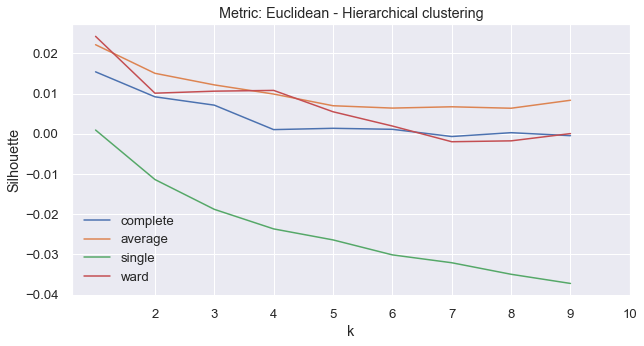

In [303]:
#Silhouette metric graph - HIERARCHICAL CLUSTERING
plt.figure(figsize = (10,5))
plt.plot(sil_v, label='complete') #complete link
plt.plot(sil_v_avg, label='average') #average link
plt.plot(sil_vs,label='single')  #single link
plt.plot(sil_vw, label='ward') #ward's method
plt.xticks(range(1,10,1), silhouette_scores.keys())
plt.title("Metric: Euclidean - Hierarchical clustering")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.legend()
plt.show()

## Hierarchical: DTW


In [270]:
import pandas as pd
import scipy.cluster.hierarchy as hac

In [271]:
dist=sklearn.metrics.pairwise.pairwise_distances(ts)

### complete link

In [304]:
#complete link _ silhouette scores
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    complete_linkage = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='precomputed')
    
    complete_linkage.fit(dist)
    labels_k = complete_linkage.labels_
    score_k = silhouette_score(dist, complete_linkage.labels_)
    silhouette_scores[k] = score_k
    
    print ('silhouette for k= {}: {}'.format(k,score_k))
print('Done')

silhouette for k= 2: 0.054494972992467715
silhouette for k= 3: 0.03713203230879299
silhouette for k= 4: 0.014987036867748653
silhouette for k= 5: 0.007667126128299272
silhouette for k= 6: 0.0014961758650630815
silhouette for k= 7: -0.0003057507027153572
silhouette for k= 8: -0.0006679030134359931
silhouette for k= 9: 0.000476979577133016
silhouette for k= 10: 0.002324452154458629
Done


In [305]:
#complete link values
sil_v_dtw = []
for i in silhouette_scores.values():
    sil_v_dtw.append(i)

### average

In [306]:
#average_link silhouette scores
k_to_test_avg = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores_avg = {}

for k in k_to_test_avg:
    average_linkage = AgglomerativeClustering(n_clusters=k, linkage='average', affinity='precomputed')
    
    average_linkage.fit(dist)
    labels_k_avg = average_linkage.labels_
    score_k_avg = silhouette_score(dist, average_linkage.labels_)
    silhouette_scores_avg[k] = score_k_avg
    
    print ('silhouette for k= {}: {}'.format(k,score_k_avg))
print('Done')

silhouette for k= 2: 0.06319138457686486
silhouette for k= 3: 0.04070667758689076
silhouette for k= 4: 0.004992916022030519
silhouette for k= 5: -0.005718102876986721
silhouette for k= 6: -0.029636195987679075
silhouette for k= 7: -0.03578813486110472
silhouette for k= 8: -0.038867635138046336
silhouette for k= 9: -0.04381713500546049
silhouette for k= 10: -0.03252748464493843
Done


In [307]:
#average link values
sil_v_avg_dtw = []
for i in silhouette_scores_avg.values():
    sil_v_avg_dtw.append(i)

## single link

In [308]:
#single link - silhouette scores
k_to_test = range(2,11,1) # [2,3,4, ..., 24]
silhouette_scores_s = {}

for k in k_to_test:
    single_linkage = AgglomerativeClustering(n_clusters=k, linkage='single', affinity='precomputed')
    
    single_linkage.fit(dist)
    labels_ks = single_linkage.labels_
    score_ks = silhouette_score(dist, single_linkage.labels_)
    silhouette_scores_s[k] = score_ks
    

    print ('silhouette for k= {}: {}'.format(k,score_ks))
print('Done')

silhouette for k= 2: -0.1845775883475914
silhouette for k= 3: -0.19514363302038304
silhouette for k= 4: -0.21137533404613223
silhouette for k= 5: -0.21970328531003408
silhouette for k= 6: -0.22283612674128245
silhouette for k= 7: -0.22906379628023557
silhouette for k= 8: -0.22995488148346782
silhouette for k= 9: -0.2340142005000799
silhouette for k= 10: -0.2355146650756439
Done


In [309]:
#single link values
sil_vs_dtw = []
for i in silhouette_scores_s.values():
    sil_vs_dtw.append(i)

### comparison of clustering methods

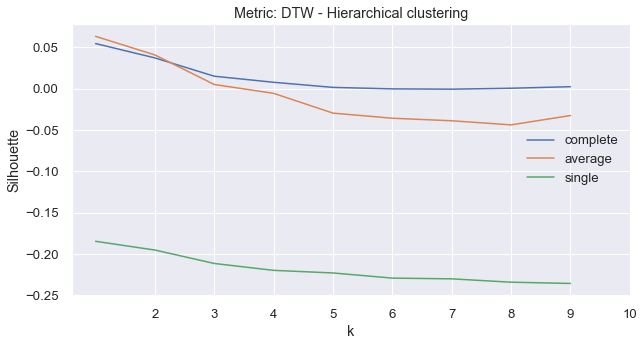

In [310]:
#Silhouette metric graph - HIERARCHICAL CLUSTERING
plt.figure(figsize = (10,5))
plt.plot(sil_v_dtw, label='complete') #complete link
plt.plot(sil_v_avg_dtw, label='average') #average link
plt.plot(sil_vs_dtw,label='single')  #single link
plt.xticks(range(1,10,1), silhouette_scores.keys())
plt.title("Metric: DTW - Hierarchical clustering")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.legend()
plt.show()

The best one si the complete linkage

# Complete linkage

In [321]:
dtw_hier2 = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='precomputed')
dtw_hier2.fit_predict(dist)
dist.shape

(1028, 1028)

In [322]:
np.unique(dtw_hier2.labels_,)

array([0, 1, 2], dtype=int64)

In [323]:
ts_df_hier2=ts_df.copy()
ts_df_hier2['Cluster']=dtw_hier2.labels_

In [324]:
clas_0_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Classical'][ts_df_hier2["Cluster"]==0].index
clas_1_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Classical'][ts_df_hier2["Cluster"]==1].index
clas_2_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Classical'][ts_df_hier2["Cluster"]==2].index
old_0_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Old-Time / Historic'][ts_df_hier2["Cluster"]==0].index
old_1_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Old-Time / Historic'][ts_df_hier2["Cluster"]==1].index
old_2_h2=ts_df_hier2[ts_df_hier2['genre_top']=='Old-Time / Historic'][ts_df_hier2["Cluster"]==2].index

In [325]:
print('Cluster 0: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_0_h2),len(old_0_h2),len(old_0_h2)+len(clas_0_h2)))
print('Cluster 1: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_1_h2),len(old_1_h2),len(old_1_h2)+len(clas_1_h2)))
print('Cluster 2: Classical:{},Old-Time/Historic:{}, Total of:{}'.format(len(clas_2_h2),len(old_2_h2),len(old_2_h2)+len(clas_2_h2)))


Cluster 0: Classical:334,Old-Time/Historic:344, Total of:678
Cluster 1: Classical:100,Old-Time/Historic:71, Total of:171
Cluster 2: Classical:92,Old-Time/Historic:87, Total of:179


Text(0.16, 0.86, 'Cluster')

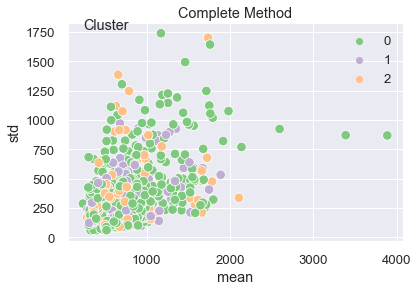

In [326]:
sns.scatterplot(data=ts_df_hier2, x='mean', y='std',hue= 'Cluster', palette='Accent',s=90)
plt.legend()
plt.title('Complete Method')
plt.figtext(0.16,0.86,'Cluster')

Text(0.5, 1.0, 'Genres per Cluster')

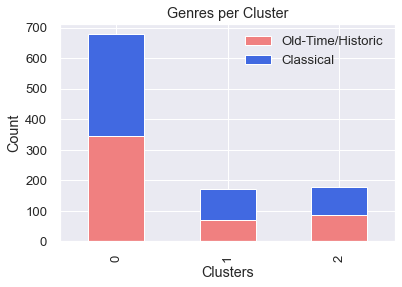

In [329]:
ts_df_hier2['Old-Time/Historic'] = ts_df_hier2['genre_top'].map({'Old-Time / Historic':1, 'Classical':0}) 
ts_df_hier2['Classical'] = ts_df_hier2['genre_top'].map({'Old-Time / Historic':0, 'Classical':1}) 

ts_df_hier2.groupby('Cluster').agg('sum')[['Old-Time/Historic', 'Classical']].plot(kind='bar', stacked=True, color=['lightcoral', 'royalblue'])
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.legend()
plt.title('Genres per Cluster')

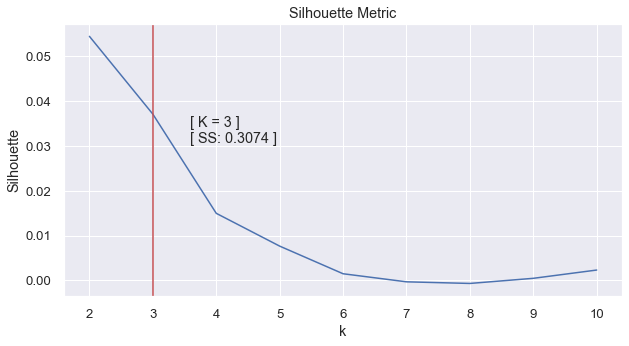

In [331]:
#Silhouette metric graph
plt.figure(figsize = (10,5))
plt.plot(sil_v_dtw)
plt.xticks(range(0,9,1), silhouette_scores_w.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.figtext(0.3,0.55,'[ K = 3 ]\n[ SS: 0.3074 ] ')
plt.show()
